### Summary: This Python code trains a Convolutional Neural Network (CNN) to classify different types of vehicle damages based on images and classifies them into fraudulent and non-fraudulent for insurance verification

## Importing Libraries

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Load Training Data and Images

In [4]:
# Load Training CSV and Prepare Labels
train_csv_path = r"C:\Users\user\OneDrive - hull.ac.uk\COURSES\Understanding AI\Summative assignment\CNN DATA\train\train\train.csv"
train_df = pd.read_csv(train_csv_path)
train_df['label'] = train_df['label'] - 1  # Adjusting labels to 0-5

print(train_df.head())
print("\nLabel distribution:\n", train_df['label'].value_counts())

# Load Training Images
train_images_path = r"C:\Users\user\OneDrive - hull.ac.uk\COURSES\Understanding AI\Summative assignment\CNN DATA\train\train\images"
def load_images(data, image_dir):
    images = []
    labels = []
    for _, row in data.iterrows():
        img_path = os.path.join(image_dir, row['filename'])
        img = load_img(img_path, target_size=(128, 128))
        images.append(img_to_array(img))
        labels.append(row['label'])
    return np.array(images), np.array(labels)

train_images, train_labels = load_images(train_df, train_images_path)
train_images = train_images / 255.0 

print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

   image_id filename  label
0         1    1.jpg      1
1         2    2.jpg      3
2         3    3.jpg      1
3         4    4.jpg      2
4         5    5.jpg      4

Label distribution:
 label
1    2349
3    2079
4    1185
5     882
2     534
0     171
Name: count, dtype: int64
Training images shape: (7200, 128, 128, 3)
Training labels shape: (7200,)


## Splitting into Training and Validation Sets

In [24]:
# Split Data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

X_train shape: (5760, 128, 128, 3)
X_val shape: (1440, 128, 128, 3)


## Building The CNN Model

In [6]:
# the CNN Model with Augmentation and Regularization
model = Sequential([
    Input(shape=(128, 128, 3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,310 (12.61 MB)

 Trainable params: 3,305,862 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

## Adding Callbacks

In [7]:
# Callbacks: EarlyStopping, ModelCheckpoint, and ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

## Training the model

In [8]:
# Training the Model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)


Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.3483 - loss: 5.8582  

180/180 ━━━━━━━━━━━━━━━━━━━━ 116s 610ms/step - accuracy: 0.3484 - loss: 5.8534 - val_accuracy: 0.2812 - val_loss: 4.7490 - learning_rate: 0.0010
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.3974 - loss: 2.4454  

180/180 ━━━━━━━━━━━━━━━━━━━━ 139s 588ms/step - accuracy: 0.3974 - loss: 2.4436 - val_accuracy: 0.4243 - val_loss: 2.5553 - learning_rate: 0.0010
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.4375 - loss: 1.4573  

180/180 ━━━━━━━━━━━━━━━━━━━━ 108s 599ms/step - accuracy: 0.4376 - loss: 1.4569 - val_accuracy: 0.4618 - val_loss: 1.8572 - learning_rate: 0.0010
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.4742 - loss: 1.2568  

180/180 ━━━━━━━━━━━━━━━━━━━━ 109s 608ms/step - accuracy: 0.4741 - loss: 1.2569 - val_accuracy: 0.4840 - val_loss: 1.3190 - learning_rate: 0.0010
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 144s 619ms/step - accuracy: 0.4614 - loss: 1.2380 - val_accuracy: 0.5021 - val_loss: 1.4084 - learning_rate: 0.0010
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.4878 - loss: 1.2051  

180/180 ━━━━━━━━━━━━━━━━━━━━ 115s 636ms/step - accuracy: 0.4878 - loss: 1.2050 - val_accuracy: 0.4792 - val_loss: 1.3046 - learning_rate: 0.0010
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.5079 - loss: 1.1748  

180/180 ━━━━━━━━━━━━━━━━━━━━ 134s 744ms/step - accuracy: 0.5079 - loss: 1.1748 - val_accuracy: 0.5201 - val_loss: 1.1520 - learning_rate: 0.0010
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.4957 - loss: 1.1530  

180/180 ━━━━━━━━━━━━━━━━━━━━ 146s 810ms/step - accuracy: 0.4957 - loss: 1.1529 - val_accuracy: 0.5104 - val_loss: 1.1380 - learning_rate: 0.0010
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 185s 717ms/step - accuracy: 0.5237 - loss: 1.1153 - val_accuracy: 0.5368 - val_loss: 1.1433 - learning_rate: 0.0010
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 140s 706ms/step - accuracy: 0.5437 - loss: 1.1102 - val_accuracy: 0.5208 - val_loss: 1.2577 - learning_rate: 0.0010
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.5352 - loss: 1.0955  

180/180 ━━━━━━━━━━━━━━━━━━━━ 131s 730ms/step - accuracy: 0.5352 - loss: 1.0954 - val_accuracy: 0.5431 - val_loss: 1.0822 - learning_rate: 0.0010
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.5451 - loss: 1.0538  

180/180 ━━━━━━━━━━━━━━━━━━━━ 140s 716ms/step - accuracy: 0.5451 - loss: 1.0538 - val_accuracy: 0.5736 - val_loss: 1.0069 - learning_rate: 0.0010
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 146s 811ms/step - accuracy: 0.5637 - loss: 1.0311 - val_accuracy: 0.3736 - val_loss: 2.5062 - learning_rate: 0.0010
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 129s 717ms/step - accuracy: 0.5478 - loss: 1.0554 - val_accuracy: 0.5361 - val_loss: 1.1044 - learning_rate: 0.0010
Epoch 15/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.5814 - loss: 1.0056  
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
180/180 ━━━━━━━━━━━━━━━━━━━━ 142s 789ms/step - accuracy: 0.5813 - loss: 1.0057 - val_accuracy: 0.5222 - val_loss: 1.1436 - learning_rate: 0.0010
Epoch 16/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 142s 785ms/step - accuracy: 0.5877 - loss: 0.9655 - val_accuracy: 0.5979 - val_loss: 1.0132 - learning_rate: 5.0000e-04
Epoch 17/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 

180/180 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.5934 - loss: 0.9404 - val_accuracy: 0.6215 - val_loss: 0.9107 - learning_rate: 5.0000e-04
Epoch 18/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 147s 819ms/step - accuracy: 0.6166 - loss: 0.9107 - val_accuracy: 0.5764 - val_loss: 1.3326 - learning_rate: 5.0000e-04
Epoch 19/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.6411 - loss: 0.8516  

180/180 ━━━━━━━━━━━━━━━━━━━━ 151s 836ms/step - accuracy: 0.6410 - loss: 0.8517 - val_accuracy: 0.6646 - val_loss: 0.8976 - learning_rate: 5.0000e-04
Epoch 20/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 151s 842ms/step - accuracy: 0.6281 - loss: 0.8665 - val_accuracy: 0.6229 - val_loss: 1.0080 - learning_rate: 5.0000e-04
Epoch 21/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 118s 654ms/step - accuracy: 0.6292 - loss: 0.8568 - val_accuracy: 0.6410 - val_loss: 0.9153 - learning_rate: 5.0000e-04
Epoch 22/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.6402 - loss: 0.8454  

180/180 ━━━━━━━━━━━━━━━━━━━━ 132s 733ms/step - accuracy: 0.6402 - loss: 0.8454 - val_accuracy: 0.6632 - val_loss: 0.8927 - learning_rate: 5.0000e-04
Epoch 23/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 121s 670ms/step - accuracy: 0.6407 - loss: 0.8196 - val_accuracy: 0.6139 - val_loss: 1.0754 - learning_rate: 5.0000e-04
Epoch 24/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.6490 - loss: 0.8234  

180/180 ━━━━━━━━━━━━━━━━━━━━ 125s 697ms/step - accuracy: 0.6490 - loss: 0.8234 - val_accuracy: 0.6632 - val_loss: 0.8158 - learning_rate: 5.0000e-04
Epoch 25/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.6721 - loss: 0.7846  

180/180 ━━━━━━━━━━━━━━━━━━━━ 142s 695ms/step - accuracy: 0.6721 - loss: 0.7847 - val_accuracy: 0.6910 - val_loss: 0.7649 - learning_rate: 5.0000e-04
Epoch 26/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.6732 - loss: 0.7781  

180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 709ms/step - accuracy: 0.6732 - loss: 0.7781 - val_accuracy: 0.6840 - val_loss: 0.7595 - learning_rate: 5.0000e-04
Epoch 27/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 122s 678ms/step - accuracy: 0.6736 - loss: 0.7817 - val_accuracy: 0.6722 - val_loss: 0.7988 - learning_rate: 5.0000e-04
Epoch 28/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 112s 620ms/step - accuracy: 0.6691 - loss: 0.7852 - val_accuracy: 0.6819 - val_loss: 0.7886 - learning_rate: 5.0000e-04
Epoch 29/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.7014 - loss: 0.7531  

180/180 ━━━━━━━━━━━━━━━━━━━━ 118s 658ms/step - accuracy: 0.7013 - loss: 0.7531 - val_accuracy: 0.7076 - val_loss: 0.7195 - learning_rate: 5.0000e-04
Epoch 30/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 116s 644ms/step - accuracy: 0.6904 - loss: 0.7290 - val_accuracy: 0.6799 - val_loss: 1.1054 - learning_rate: 5.0000e-04


## VIsualize Training and validation curves

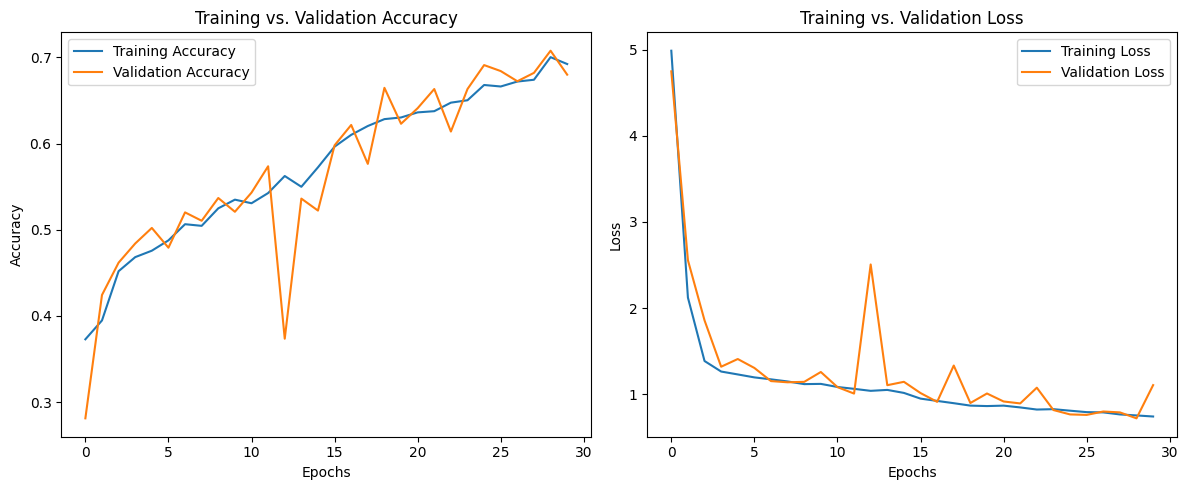

In [18]:
# Plot Training and Validation Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.savefig("Training vs. Validation Accuracy.png")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs. Validation Loss")
plt.tight_layout()
plt.savefig("Training vs. Validation Loss.png")
plt.show()

## Confusion Matrix and Classification Report

45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step


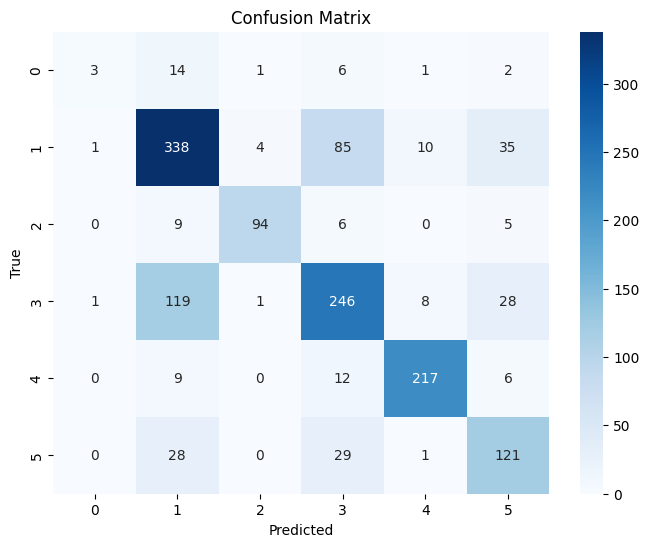

              precision    recall  f1-score   support

           0       0.60      0.11      0.19        27
           1       0.65      0.71      0.68       473
           2       0.94      0.82      0.88       114
           3       0.64      0.61      0.63       403
           4       0.92      0.89      0.90       244
           5       0.61      0.68      0.64       179

    accuracy                           0.71      1440
   macro avg       0.73      0.64      0.65      1440
weighted avg       0.71      0.71      0.71      1440



In [19]:
# Evaluate with a Confusion Matrix on Validation Set
val_predictions = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix.png")
plt.show()

print(classification_report(y_val, val_predictions))

## Load Test Data And Images

In [14]:
# 9. Load Test Data
test_csv_path = r"C:\Users\user\OneDrive - hull.ac.uk\COURSES\Understanding AI\Summative assignment\CNN DATA\test\test\test.csv"
test_data = pd.read_csv(test_csv_path)
test_images_path = r"C:\Users\user\OneDrive - hull.ac.uk\COURSES\Understanding AI\Summative assignment\CNN DATA\test\test\images"

def load_test_images(data, image_dir):
    images = []
    for _, row in data.iterrows():
        img_path = os.path.join(image_dir, row['filename'])
        img = load_img(img_path, target_size=(128, 128))
        images.append(img_to_array(img))
    return np.array(images)

test_images = load_test_images(test_data, test_images_path)
test_images = test_images / 255.0

## Visualize predictions

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step


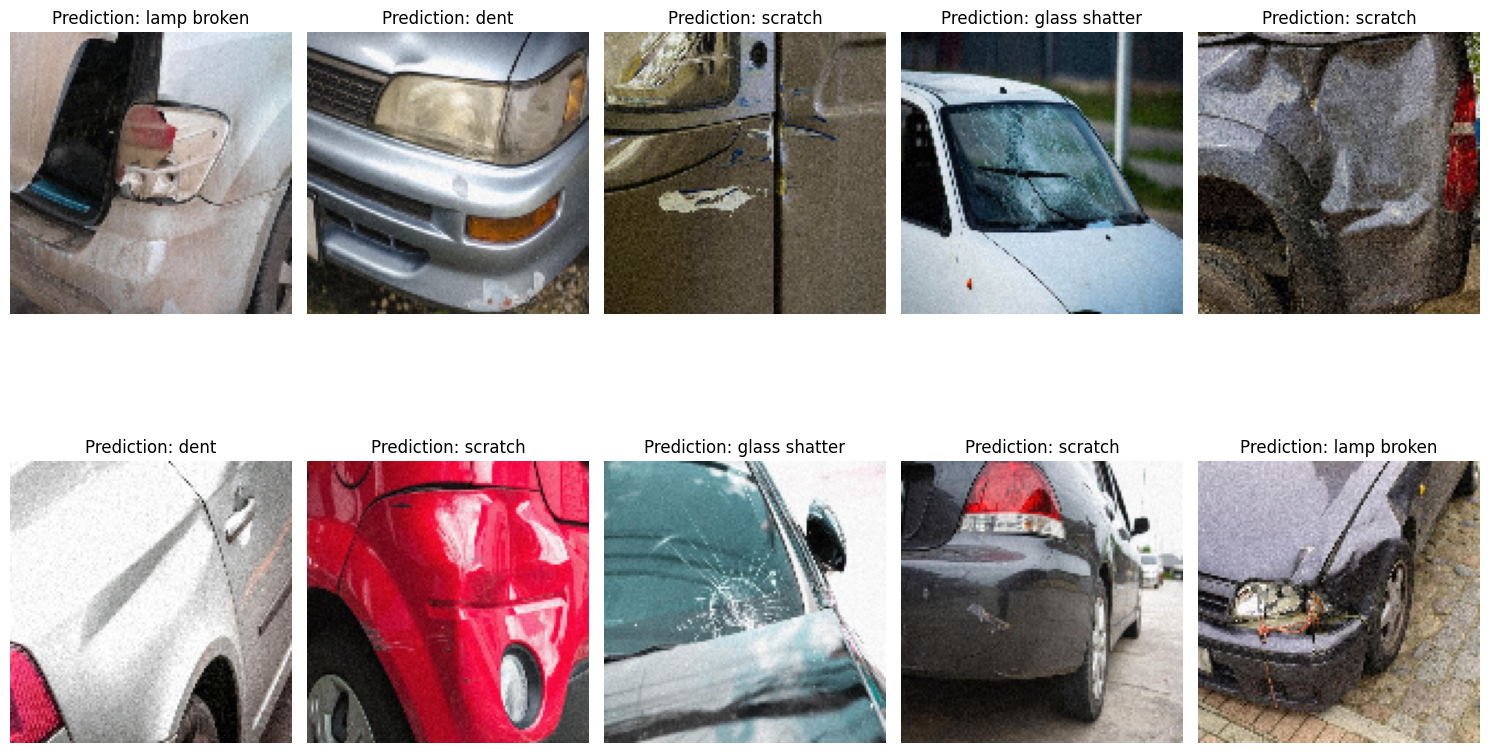

In [16]:
# Test Predictions and Visualization
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Mapping of class indices to labels
label_names = {
    0: 'crack',
    1: 'scratch',
    2: 'tire flat',
    3: 'dent',
    4: 'glass shatter',
    5: 'lamp broken'
}

def visualize_predictions(test_images, predicted_classes, num_samples=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(array_to_img(test_images[i]))
        plt.title(f"Prediction: {label_names.get(predicted_classes[i], 'N/A')}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_predictions(test_images, predicted_classes, num_samples=10)

150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step


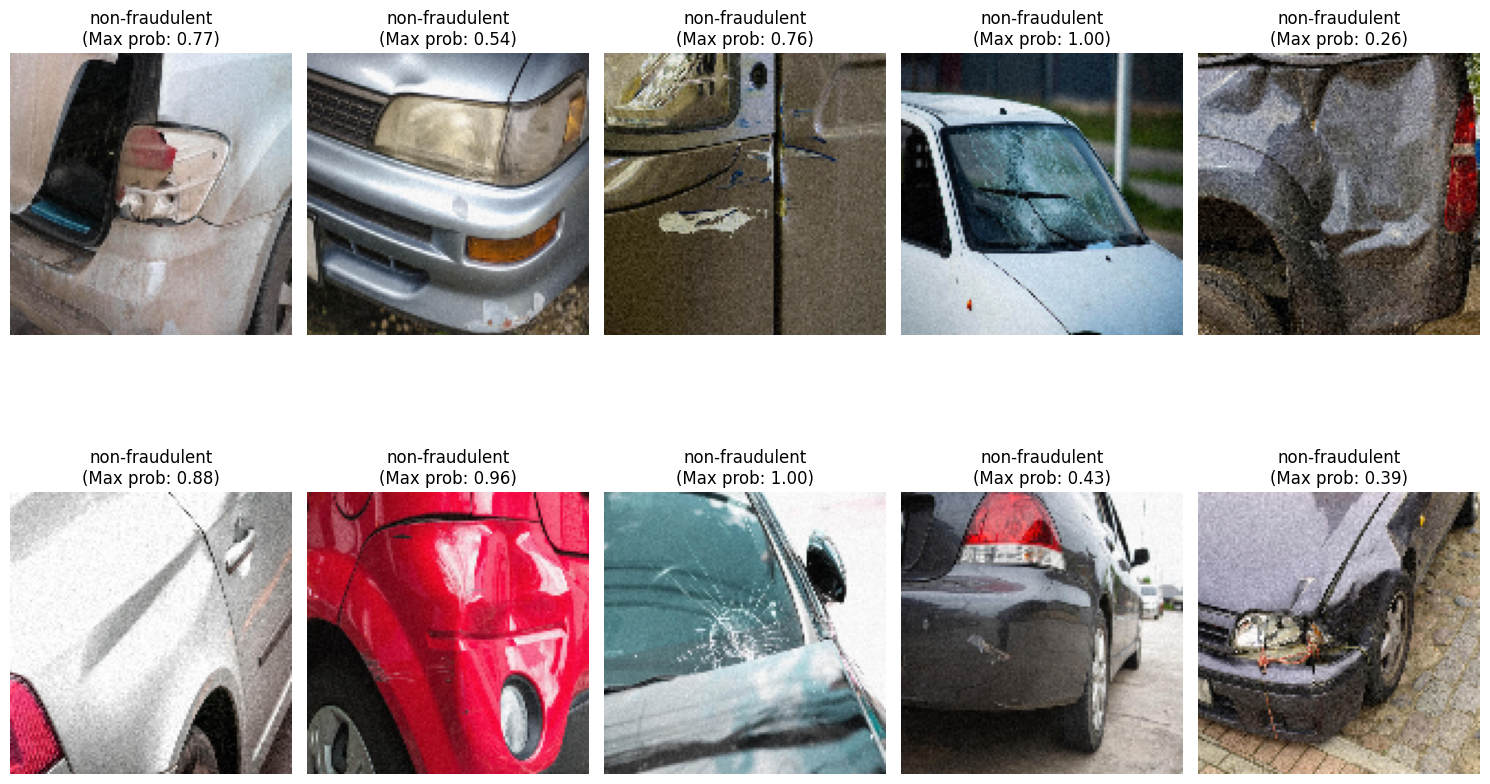

In [17]:
# Mapping of class indices to labels
label_names = {
    0: 'crack',
    1: 'scratch',
    2: 'tire flat',
    3: 'dent',
    4: 'glass shatter',
    5: 'lamp broken'
}

def visualize_fraud_detection(test_images, predictions, threshold=0.8, num_samples=10):
    """
    For each of the first num_samples test images, check the maximum predicted probability.
    If the maximum probability is >= threshold, classify the image as "non-fraudulent";
    otherwise, classify it as "fraudulent."
    """
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(array_to_img(test_images[i]))
        max_prob = np.max(predictions[i])
        # Determine fraud label based on threshold
        if max_prob >= threshold:
            fraud_label = "non-fraudulent"
        else:
            fraud_label = "fraudulent"
        plt.title(f"{fraud_label}\n(Max prob: {max_prob:.2f})")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Get predictions from the mode
predictions = model.predict(test_images)

# Visualize fraud detection results
visualize_fraud_detection(test_images, predictions, threshold=0.2, num_samples=10)
